Box dimensions: [12.42 12.42 12.42 90.   90.   90.  ]


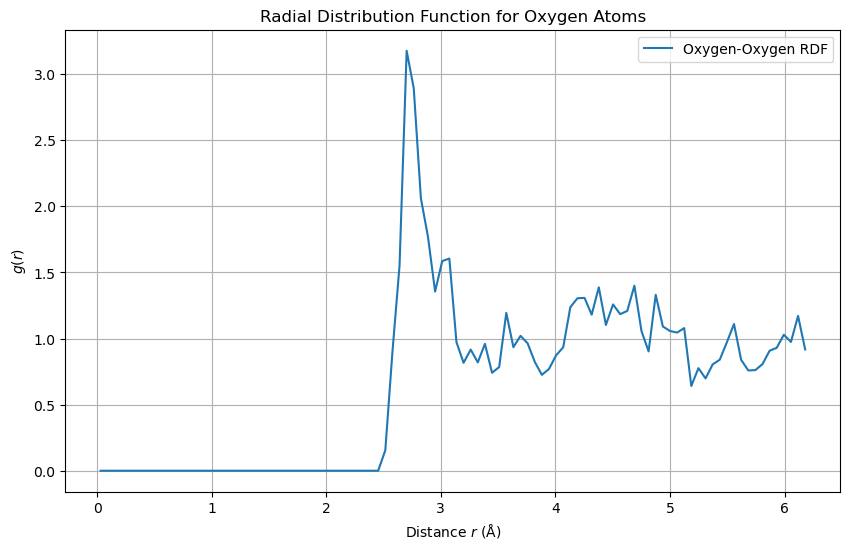

In [13]:
import MDAnalysis as mda
from MDAnalysis.analysis.rdf import InterRDF
import numpy as np
import matplotlib.pyplot as plt

# Define box size
box_size = [12.42, 12.42, 12.42]  # Replace with your box dimensions in Å

# Load the trajectory
u = mda.Universe("water_aimd_1ps_every0.5fs-pos-1.xyz", format="XYZ")
u.dimensions = np.array(box_size + [90.0, 90.0, 90.0])  # Add box angles for PBCs

# Select only oxygen atoms
oxygen_atoms = u.select_atoms("name O")  # Adjust 'name O' based on labels in the XYZ file

# Compute RDF with proper normalization and range
rdf = InterRDF(
    oxygen_atoms, oxygen_atoms, 
    range=(0.0, box_size[0] / 2), 
    nbins=100,  # Set an appropriate number of bins
    exclusion_block=(1, 1)  # Avoid self-pairs if applicable
)
rdf.run()

# Verify box dimensions
print("Box dimensions:", u.dimensions)

# Plot RDF
plt.figure(figsize=(10, 6))
plt.plot(rdf.results.bins, rdf.results.rdf, label="Oxygen-Oxygen RDF")
plt.xlabel("Distance $r$ (Å)")
plt.ylabel("$g(r)$")
plt.title("Radial Distribution Function for Oxygen Atoms")
plt.legend()
plt.grid(True)
plt.show()
